# Predict delivery time using sorting time 

In [54]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [55]:
#Read the data

In [56]:
data=pd.read_csv('delivery_time.csv')

In [57]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [58]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### data insights

In [59]:
data.shape

(21, 2)

In [60]:
#data contains 21 columns(observations) and 2 variables/features

In [61]:
data.rename(columns={'Delivery Time':'DeliveryTime','Sorting Time':'SortingTime'},inplace=True)
data

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### checking the duplicates in dataset

In [62]:
data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [63]:
data[data.duplicated()]

,DeliveryTime,SortingTime


In [64]:
#there are no dupliates in the data

### describe the data

In [65]:
data.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### understanding the target variable

In [66]:
data['DeliveryTime'].unique()

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

In [67]:
data['DeliveryTime'].value_counts()

DeliveryTime
21.00    1
10.75    1
17.83    1
8.00     1
18.11    1
13.75    1
14.88    1
12.03    1
11.50    1
16.68    1
19.83    1
13.50    1
18.75    1
17.90    1
9.50     1
19.00    1
15.35    1
29.00    1
24.00    1
19.75    1
21.50    1
Name: count, dtype: int64

In [68]:
#there are no duplicates in the dataset

### Performing EDA On Data

##### Renaming columns

In [69]:
data1 = data.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
data1

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#### Checking Datatype

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


### Checking for Null Values

In [71]:
data.isnull().sum()

DeliveryTime    0
SortingTime     0
dtype: int64

<Axes: >

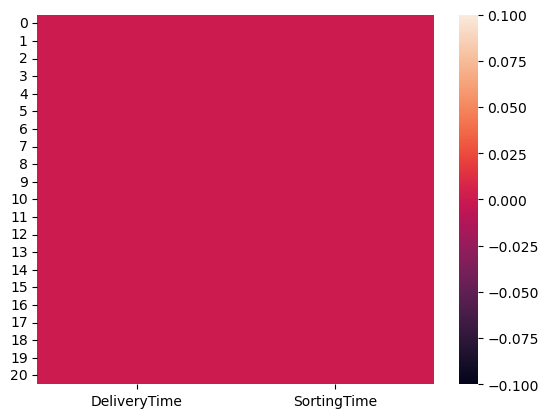

In [72]:
sns.heatmap(data.isnull())

### Plotting the data to check for outliers

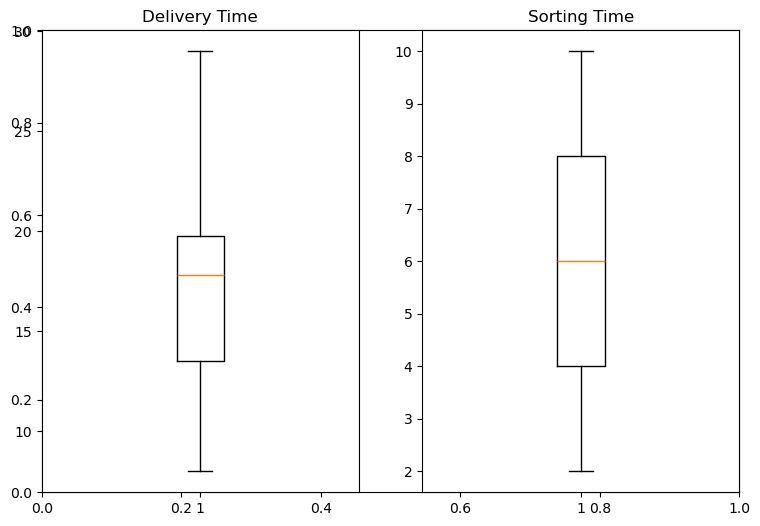

In [75]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(data['DeliveryTime'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(data['SortingTime'])
plt.title('Sorting Time')
plt.show()

### there is no outliers in the data

## Checking the Correlation between variables

In [76]:
data.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


### Visualization of Correlation beteen x and y

### regplot = regression plot

<Axes: xlabel='SortingTime', ylabel='DeliveryTime'>

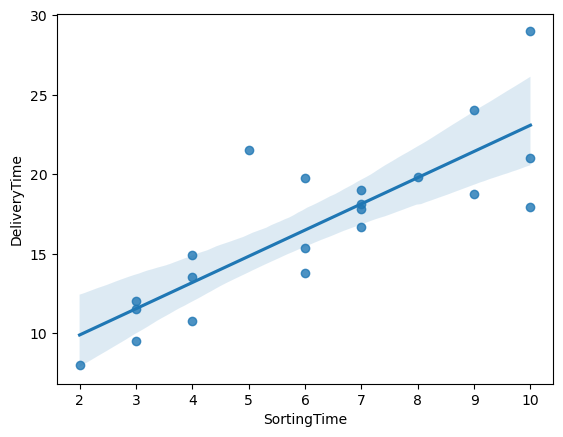

In [78]:
sns.regplot(x=data['SortingTime'],y=data['DeliveryTime'])  

### Correlation

In [79]:
#finding the relation between two variable

<Axes: >

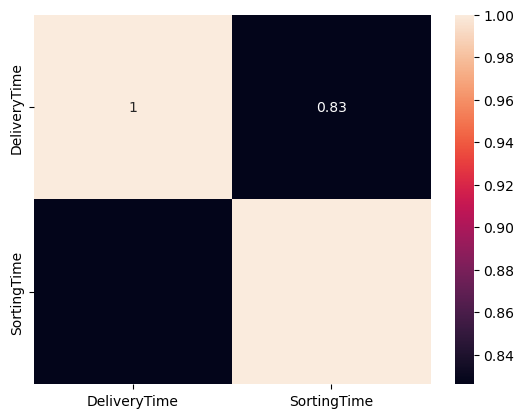

In [80]:
sns.heatmap(data.corr(),annot=True)

There is good correlation between the two variable.
The score is more than 0.8 which is a good sign

## Checking for Homoscedasticity or Hetroscedasticity

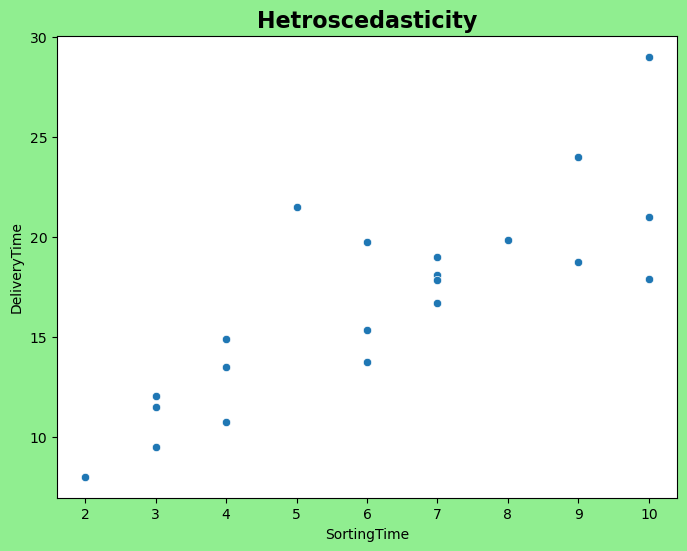

In [82]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = data['SortingTime'], y = data['DeliveryTime'])
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [83]:
data.var()

DeliveryTime    25.754619
SortingTime      6.461905
dtype: float64

It shows as the Sorting Time Increases Delivery Time also increases with much variation along the way
The data doesn't have any specific pattern in the variation, but we can't say the variation is homoscedasticity.

### Feature Engineering

#### Trying different transformation of data to estimate normal distribution and to remove any skewness

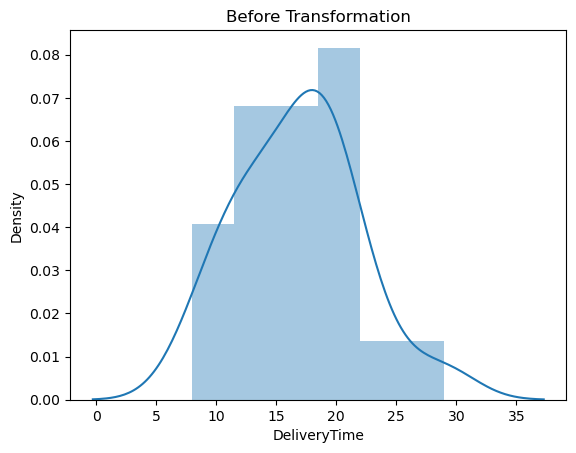

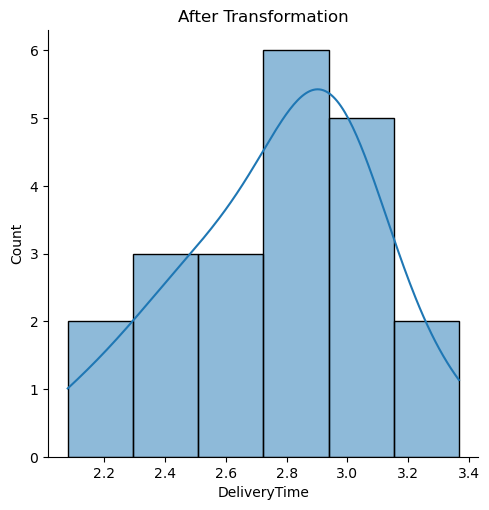

In [85]:
sns.distplot(data['DeliveryTime'], bins = 6, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(data['DeliveryTime']), bins = 6, kde = True)
plt.title('After Transformation')
plt.show()

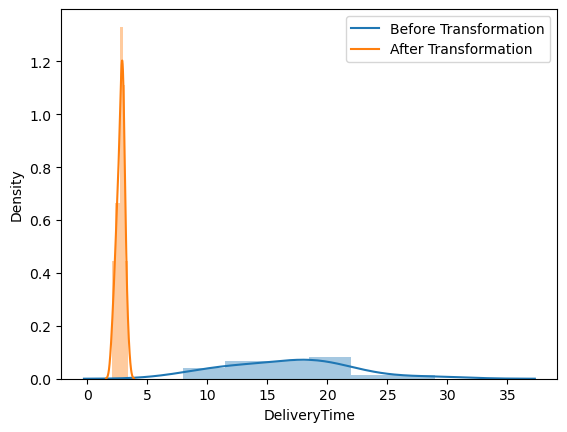

In [88]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['DeliveryTime'], bins = 6, kde = True)
sns.distplot(np.log(data['DeliveryTime']), bins = 6, kde = True)
plt.legend(labels)
plt.show()

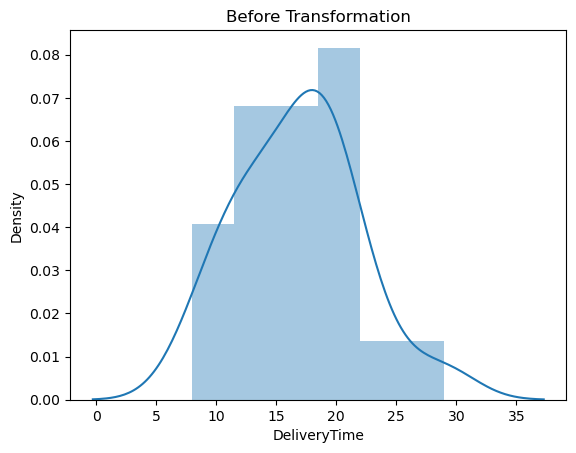

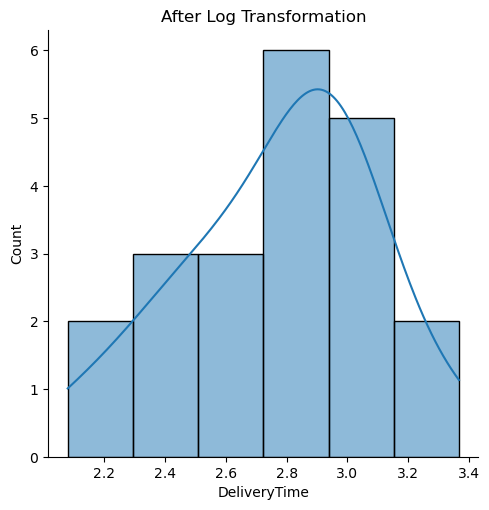

In [89]:
sns.distplot(data['DeliveryTime'], bins = 6, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(data['DeliveryTime']), bins = 6, kde = True)
plt.title('After Log Transformation')
plt.show()

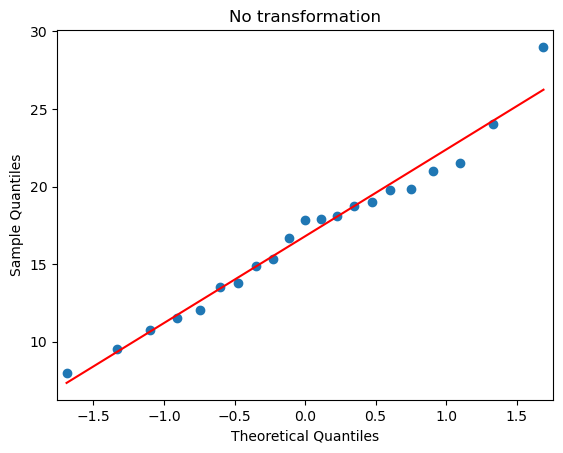

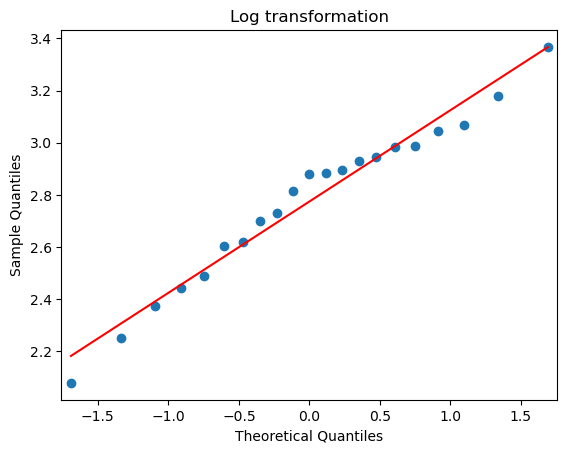

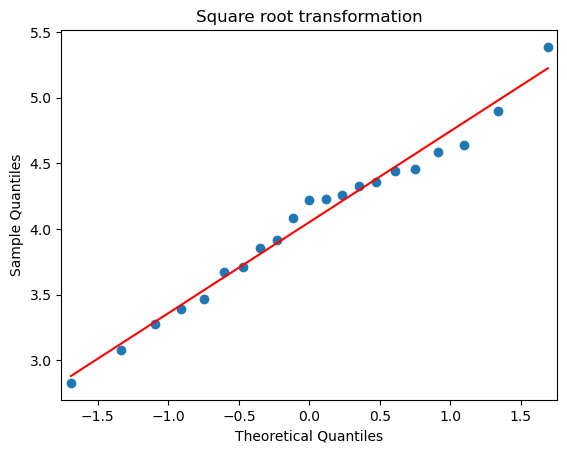

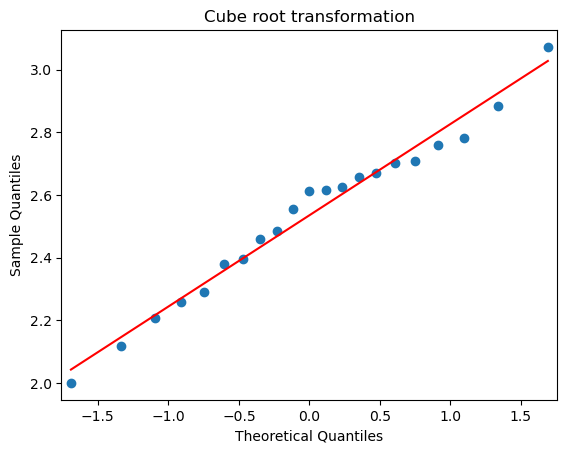

In [90]:
smf.qqplot(data['DeliveryTime'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(data['DeliveryTime']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['DeliveryTime']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['DeliveryTime']), line = 'r')
plt.title('Cube root transformation')
plt.show()

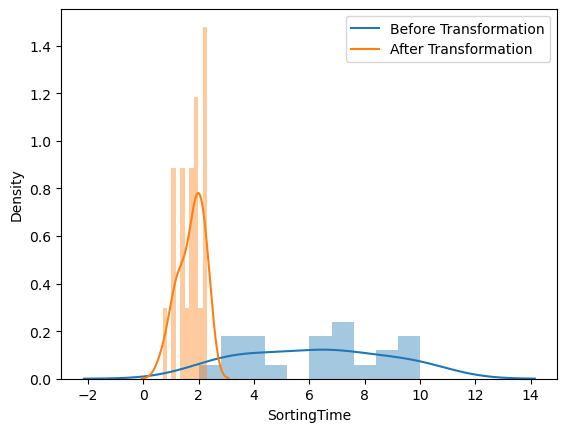

In [91]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['SortingTime'], bins = 10, kde = True)
sns.distplot(np.log(data['SortingTime']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

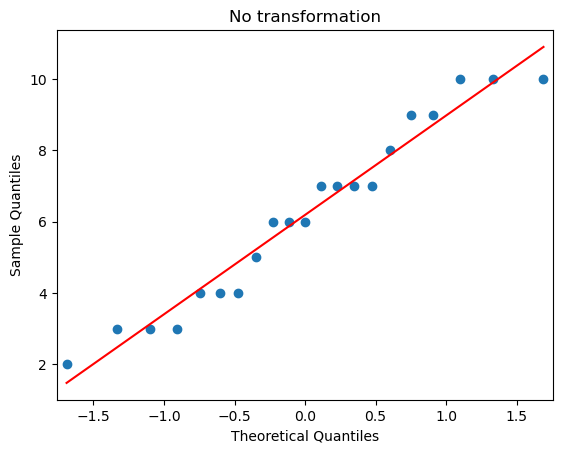

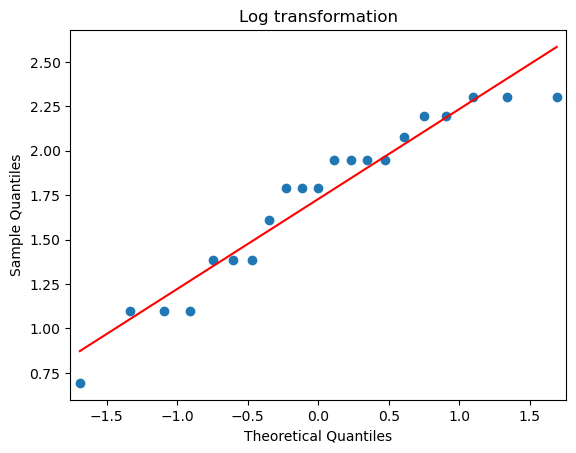

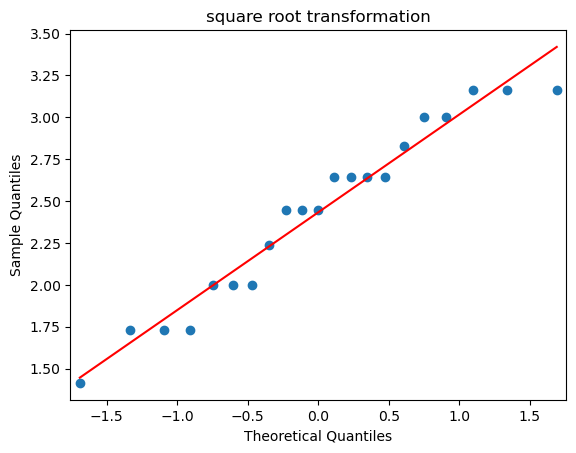

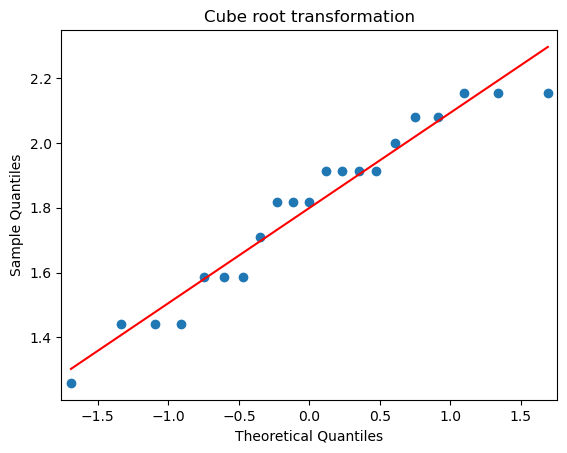

In [93]:
smf.qqplot(data['SortingTime'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(data['SortingTime']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['SortingTime']), line = 'r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(data['SortingTime']), line = 'r')
plt.title('Cube root transformation')
plt.show()

#### We only Perform any data transformation when the data is skewed or not normal

## Fitting a Linear Regression Model

### Using Ordinary least squares (OLS) regression


In [98]:
model = sm.ols('DeliveryTime~SortingTime', data = data1).fit()

In [99]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 30 Dec 2023   Prob (F-statistic):           3.98e-06
Time:                        22:45:58   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Square Root transformation on data

In [100]:
square_root_model = sm.ols('np.sqrt(DeliveryTime)~np.sqrt(SortingTime)', data = data1).fit()
square_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.sqrt(DeliveryTime)   R-squared:                       0.729
Model:                               OLS   Adj. R-squared:                  0.715
Method:                    Least Squares   F-statistic:                     51.16
Date:                   Sat, 30 Dec 2023   Prob (F-statistic):           8.48e-07
Time:                           22:46:02   Log-Likelihood:                -5.7320
No. Observations:                     21   AIC:                             15.46
Df Residuals:                         19   BIC:                             17.55
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(SortingTime)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Cube Root transformation on Data

In [102]:
cube_root_model = sm.ols('np.cbrt(DeliveryTime)~np.cbrt(SortingTime)', data = data1).fit()
cube_root_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.cbrt(DeliveryTime)   R-squared:                       0.744
Model:                               OLS   Adj. R-squared:                  0.731
Method:                    Least Squares   F-statistic:                     55.25
Date:                   Sat, 30 Dec 2023   Prob (F-statistic):           4.90e-07
Time:                           22:46:12   Log-Likelihood:                 13.035
No. Observations:                     21   AIC:                            -22.07
Df Residuals:                         19   BIC:                            -19.98
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(SortingTime)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Log transformation on Data

In [104]:
log_model = sm.ols('np.log(DeliveryTime)~np.log(SortingTime)', data = data1).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.772
Model:                              OLS   Adj. R-squared:                  0.760
Method:                   Least Squares   F-statistic:                     64.39
Date:                  Sat, 30 Dec 2023   Prob (F-statistic):           1.60e-07
Time:                          22:46:24   Log-Likelihood:                 10.291
No. Observations:                    21   AIC:                            -16.58
Df Residuals:                        19   BIC:                            -14.49
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.7420      0.133     13.086      0.000       1.463       2.021
np.log(SortingTime)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Testing

#### As Y = Beta0 + Beta1*(X)

### Finding Coefficient Parameters (Beta0 and Beta1 values)

In [105]:
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [106]:
print(model.tvalues,'\n',model.pvalues)

Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [107]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

#### Determination Coefficient = rsquared value = 0.68 ; very good fit >= 85%

## Residual Analysis

### Test for Normality of Residuals (Q-Q Plot)

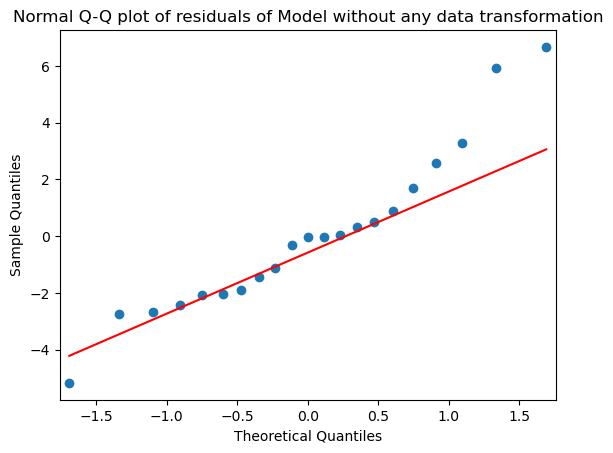

In [108]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

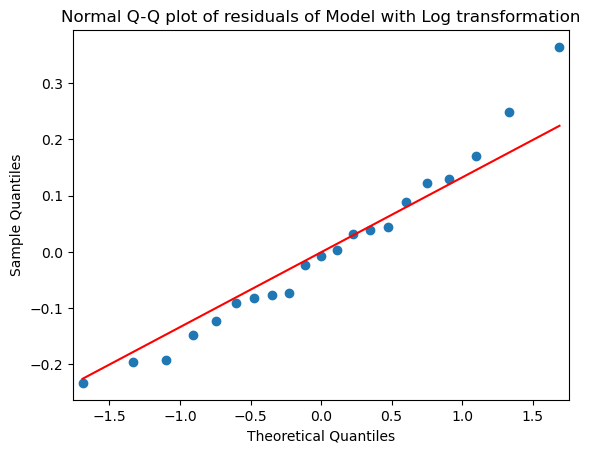

In [109]:
sm.qqplot(log_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Log transformation')
plt.show()

### Residual Plot to check Homoscedasticity or Hetroscedasticity

In [110]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

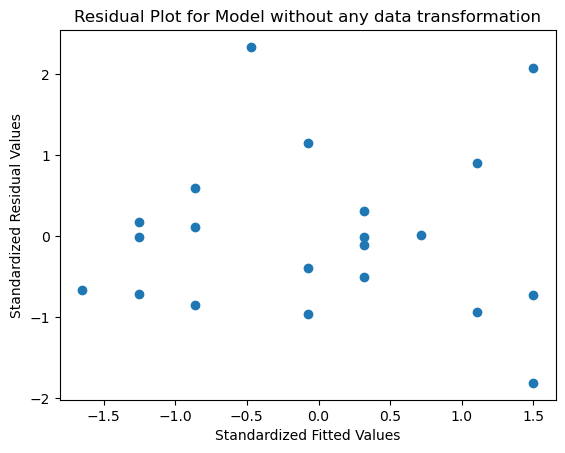

In [111]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

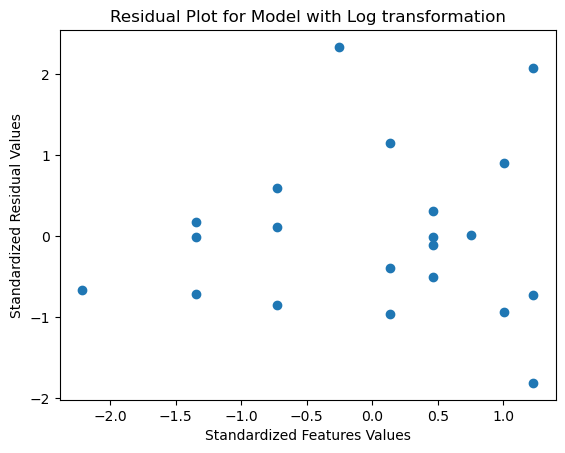

In [112]:
plt.scatter(get_standardized_values(log_model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model with Log transformation')
plt.xlabel('Standardized Features Values')
plt.ylabel('Standardized Residual Values')
plt.show()

## Model Validation

#### Comparing different models with respect to their Root Mean Squared Errors

##### We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.

In [113]:
from sklearn.metrics import mean_squared_error

In [115]:
square_root_pred_y =np.square(square_root_model.predict(data1['SortingTime']))
cube_root_pred_y =pow(cube_root_model.predict(data1['SortingTime']),3)
log_model_pred_y =np.exp(log_model.predict(data1['SortingTime']))

In [116]:
square_root_rmse =np.sqrt(mean_squared_error(data1['DeliveryTime'], square_root_pred_y))
cube_root_rmse =np.sqrt(mean_squared_error(data1['DeliveryTime'], cube_root_pred_y))
log__rmse =np.sqrt(mean_squared_error(data1['DeliveryTime'], log_model_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'square_root_model=', square_root_rmse,'\n' 'cube_root_model=', cube_root_rmse,'\n' 'log_model=', log__rmse)


model= 2.9349037688901394 
square_root_model= 2.7622942793208676 
cube_root_model= 2.7555843098935746 
log_model= 2.7458288976145493


In [117]:
data = {'model': np.sqrt(model.mse_resid), 'square_root_model': square_root_rmse, 'cube_root_model': cube_root_rmse, 'log_model' : log__rmse}
min(data, key=data.get)

'log_model'

## Predicting values from Model with Log Transformation on the Data

In [122]:
predicted = pd.DataFrame()
predicted['SortingTime'] = data1.SortingTime
predicted['DeliveryTime'] = data1.DeliveryTime
predicted['Predicted_DeliveryTime'] = pd.DataFrame(np.exp(log_model.predict(predicted.SortingTime)))
predicted

,SortingTime,DeliveryTime,Predicted_DeliveryTime
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


### Predicitng from Original Model without any data transformation

In [124]:
predicted1 = pd.DataFrame()
predicted1['SortingTime'] = data1.SortingTime
predicted1['DeliveryTime'] = data1.DeliveryTime
predicted1['Predicted_DeliveryTime'] = pd.DataFrame(model.predict(predicted1.SortingTime))
predicted1

,SortingTime,DeliveryTime,Predicted_DeliveryTime
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
